<a href="https://colab.research.google.com/github/antariksh2648/Fun-Projects/blob/main/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#Importing the dataset
pokemon = pd.read_csv("/content/pokemon.csv")
combat = pd.read_csv("/content/combats.csv")

In [3]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [4]:
combat

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [5]:
pokemon.shape #checking the dimensions of the pokemon dataset

(800, 12)

In [6]:
combat.shape #checking the dimensions of the combat dataset

(50000, 3)

In [7]:
#From the combat dataset, we will calculate the number of wins for both
#first and second winner and saw that 1 pokemon battle resulted in the draw

total_Wins = combat.Winner.value_counts()
numberOfWins = combat.groupby('Winner').count()
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("First winner: " + str(countByFirst.shape))
print("Second winner: " + str(countBySecond.shape))
print("Total Wins: " + str(total_Wins.shape))

First winner: (784, 2)
Second winner: (784, 2)
Total Wins: (783,)


In [8]:
# Here we merge the two datasets to create new columns such as Total Fights and Win Percentage.
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='#')
results3 = pd.merge(pokemon, numberOfWins, left_on='#', right_index = True, how='left')

In [9]:
#Sorted the pokemons on the basis of the win percentage.
#Silcoon(Least Win Percentage) & Mega Aerodactyl(Most Win Percentage)
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790


Text(0, 0.5, 'Total')

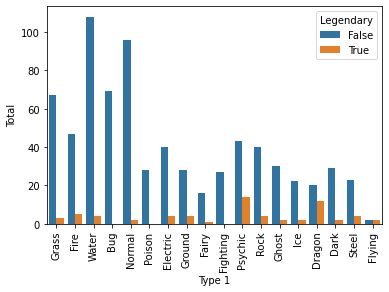

In [10]:
#Shows the counts of observations in each categorical bin using bars for type 1
#Type 1 Pokemon with Win (Blue) and Lose (Orange)
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total')

Text(0, 0.5, 'Total ')

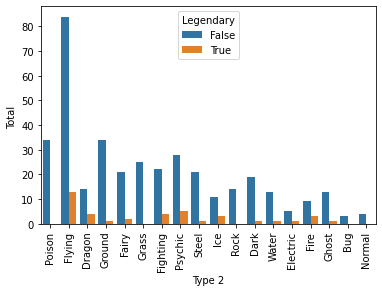

In [11]:
#Shows the counts of observations in each categorical bin using bars for type 2
#Type 2 Pokemon with Win (Blue) and Lose (Orange)
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')

In [12]:
#Creating the input and outpu set for working with the model
dataset = results2
dataset.dropna(axis=0, how='any')
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

In [13]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
#Function of the linear regression model 
def Linear(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train)) #predicting the performance of our model on test set
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred) #Calculating mean absolute error between the y_test & y_pred
    return mae
Linear(X_train, X_test, y_train, y_test)

0.907614232004021


0.06143408809230802

In [15]:
#Function of the SVM regression model 
def SVM(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train)) #predicting the performance of our model on test set
    y_pred= regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred) #Calculating mean absolute error between the y_test & y_pred
    return mae
SVM(X_train, X_test, y_train, y_test)

0.9065078337237095


0.06360099438357145

In [16]:
#Function of the Decision Tree regression model 
def DecisionTree(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train)) #predicting the performance of our model on test set
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred) #Calculating mean absolute error between the y_test & y_pred
    return mae
DecisionTree(X_train, X_test, y_train, y_test)

0.9997364519875158


0.05780669034067889

In [17]:
#Function of the Random Forest regression model
def RandomForest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train)) #predicting the performance of our model on test set
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred) #Calculating mean absolute error between the y_test & y_pred
    return mae
RandomForest(X_train, X_test, y_train, y_test)

0.9901405589914489


0.05001758969877759

In [18]:
#Here we store all the accuracy percentage in a list all_acc
all_acc = [Linear(X_train, X_test, y_train, y_test), SVM(X_train, X_test, y_train, y_test), DecisionTree(X_train, X_test, y_train, y_test), RandomForest(X_train, X_test, y_train, y_test)]

0.907614232004021
0.9065078337237095
0.9997364519875158
0.9901405589914489


In [19]:
#Here we are calculating the accuracy based on Sp. Def and Defense,and store it in a list defensive for all four models
dataset = results2
dataset.dropna(axis=0, how='any')
X = dataset.loc[:, ['Sp. Def','Defense']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

defensive = [Linear(X_train, X_test, y_train, y_test), SVM(X_train, X_test, y_train, y_test), DecisionTree(X_train, X_test, y_train, y_test), RandomForest(X_train, X_test, y_train, y_test)]

0.10606171930544417


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.09790758674041922
0.6698825050592281
0.5777037142570254


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [20]:
#Here we are calculating the accuracy based on Sp. Atk and Attack,and store it in a list attack for all four models
dataset = results2
dataset.dropna(axis=0, how='any')
X = dataset.loc[:, ['Sp. Atk','Attack']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

attack = [Linear(X_train, X_test, y_train, y_test), SVM(X_train, X_test, y_train, y_test), DecisionTree(X_train, X_test, y_train, y_test), RandomForest(X_train, X_test, y_train, y_test)]

0.34131258582246693


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3361131043998066
0.8294343125945969
0.7342245402546331


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [21]:
#Here we are calculating the accuracy based on HP and Speed,and store it in a list speed for all four models
dataset = results2
dataset.dropna(axis=0, how='any')
X = dataset.loc[:, ['HP','Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

speed = [Linear(X_train, X_test, y_train, y_test), SVM(X_train, X_test, y_train, y_test), DecisionTree(X_train, X_test, y_train, y_test), RandomForest(X_train, X_test, y_train, y_test)]

0.8916632753445364


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8900983497125865
0.9827555829995093
0.9711709180609966


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [22]:
#Here we are calculating the accuracy based on Attack and Speed,and store it in a list aggresion for all four models
dataset = results2
dataset.dropna(axis=0, how='any')
X = dataset.loc[:, ['Attack','Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

aggresion = [Linear(X_train, X_test, y_train, y_test), SVM(X_train, X_test, y_train, y_test), DecisionTree(X_train, X_test, y_train, y_test), RandomForest(X_train, X_test, y_train, y_test)]

0.9049921104553327


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9040040161126808
0.9930604401118848
0.9859675208484993


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [26]:
#Here we are calculating the accuracy based on HP and Defense,and store it in a list safe_play for all four models
dataset = results2
dataset.dropna(axis=0, how='any')
X = dataset.loc[:, ['HP','Defense']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

safe_play = [Linear(X_train, X_test, y_train, y_test), SVM(X_train, X_test, y_train, y_test), DecisionTree(X_train, X_test, y_train, y_test), RandomForest(X_train, X_test, y_train, y_test)]

0.0699333665795695


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.05649548699994977
0.7586116680095393
0.6570945954552372


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [24]:
#Here we are calculating the percentage of accuracy by subtracting the error by 1 and multiplying the result by 100.
for i in range(len(all_acc)):
    all_acc[i] = 100*(1 - all_acc[i])
    aggresion[i] = 100*(1 - aggresion[i])
    attack[i] = 100*(1 - attack[i])
    defensive[i] = 100*(1 - defensive[i])
    speed[i] = 100*(1 - speed[i])
    safe_play[i] = 100*(1 - safe_play[i])

In [25]:
#Below is the Percentage of Accuracy for each model based on the dataset.
Results = pd.DataFrame({'Accuracy': all_acc, 'Defensive': defensive, 'Attack': attack, 'HP/Speed': speed,'Aggresion':aggresion,'Safe_play':safe_play})
Results.rename(index = {0:'Linear Regression',1:'SVM', 2:'Decision Tree', 3:'Random Forest'})

,Accuracy,Defensive,Attack,HP/Speed,Aggresion,Safe_play
Linear Regression,93.856591,78.825177,82.663743,93.521455,93.718754,78.501859
SVM,93.639901,78.898366,82.784679,93.266184,93.526101,78.983719
Decision Tree,94.219331,74.169976,78.022011,93.967989,94.564391,77.770468
Random Forest,94.998241,78.924875,82.362449,94.900664,95.041490,80.007244
